In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
# Load dataset
df = pd.read_csv("data/RAW_interactions.csv")

In [16]:
df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [17]:
# Extract unique users and recipes
user_nodes = df["user_id"].unique()
recipe_nodes = df["recipe_id"].unique()

In [18]:
# Create graph
G = nx.Graph()

In [19]:
# Add user and recipe nodes with prefixes
for _, row in df.iterrows():
    user = f"U_{row['user_id']}"
    recipe = f"R_{row['recipe_id']}"
    rating = row["rating"]

    G.add_node(user, bipartite=0)  # User nodes
    G.add_node(recipe, bipartite=1)  # Recipe nodes

    # Add edge with rating as weight
    if G.has_edge(user, recipe):
        G[user][recipe]["weight"] = (G[user][recipe]["weight"] + rating) / 2  # Average ratings if multiple
    else:
        G.add_edge(user, recipe, weight=rating)

In [20]:
#  Compute correct node counts
num_users = sum(1 for n in G.nodes if str(n).startswith("U_"))
num_recipes = sum(1 for n in G.nodes if str(n).startswith("R_"))
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()

In [21]:
print(f"Number of User Nodes: {num_users}")
print(f"Number of Recipe Nodes: {num_recipes}")
print(f"Total Number of Nodes (N): {total_nodes}")
print(f"Total Number of Edges (E): {total_edges}")


Number of User Nodes: 226570
Number of Recipe Nodes: 231637
Total Number of Nodes (N): 458207
Total Number of Edges (E): 1132367


In [22]:
user_set = set(f"U_{u}" for u in user_nodes)
recipe_set = set(f"R_{r}" for r in recipe_nodes)
common_ids = user_set & recipe_set  # Should be empty now

print(f"Overlapping IDs (Should be 0): {len(common_ids)}")

Overlapping IDs (Should be 0): 0


In [23]:
# Compute degree distribution
degrees = dict(G.degree())

# Separate user and recipe degrees
user_degrees = [deg for node, deg in degrees.items() if node.startswith("U_")]
recipe_degrees = [deg for node, deg in degrees.items() if node.startswith("R_")]

# Count degree occurrences
user_degree_counts = Counter(user_degrees)
recipe_degree_counts = Counter(recipe_degrees)

# Sort for plotting
user_x, user_y = zip(*sorted(user_degree_counts.items()))
recipe_x, recipe_y = zip(*sorted(recipe_degree_counts.items()))

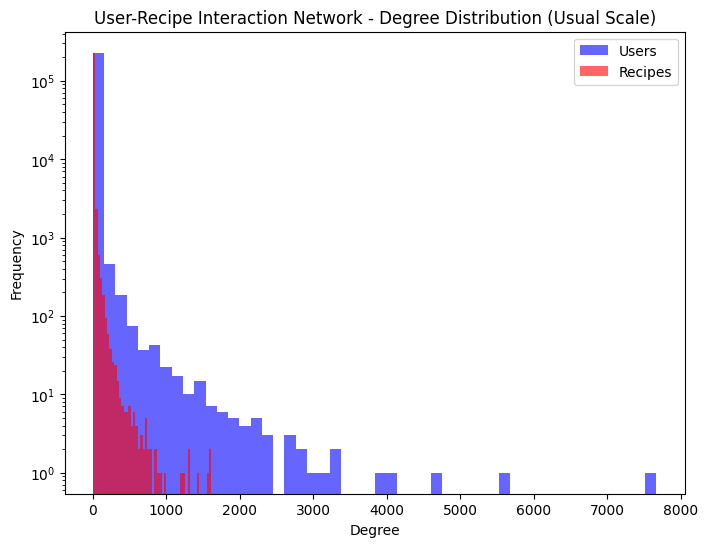

In [24]:
# Plot 1: Usual Scale
plt.figure(figsize=(8, 6))
plt.hist(user_degrees, bins=50, alpha=0.6, color='blue', label="Users")
plt.hist(recipe_degrees, bins=50, alpha=0.6, color='red', label="Recipes")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("User-Recipe Interaction Network - Degree Distribution (Usual Scale)")
plt.legend()
plt.yscale('log')  # Log scale for better visibility
plt.show()

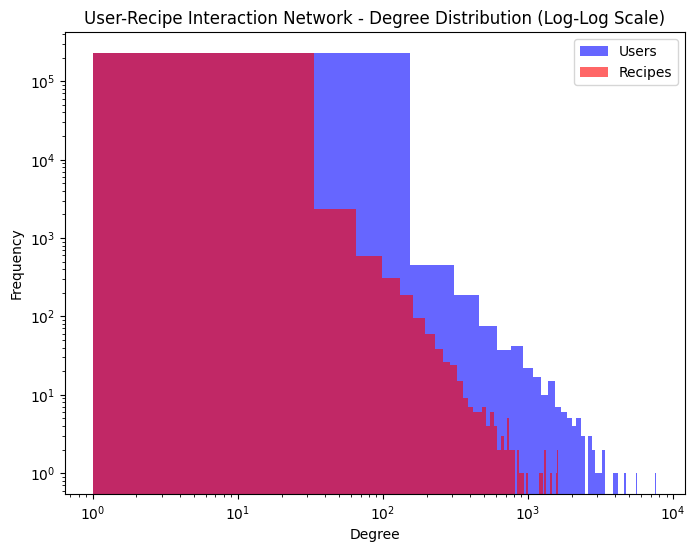

In [25]:
# Plot 2: Log-Log Scale (Histogram)
plt.figure(figsize=(8, 6))
plt.hist(user_degrees, bins=50, alpha=0.6, color='blue', label="Users", log=True)
plt.hist(recipe_degrees, bins=50, alpha=0.6, color='red', label="Recipes", log=True)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xscale("log")
plt.yscale("log")
plt.title("User-Recipe Interaction Network - Degree Distribution (Log-Log Scale)")
plt.legend()
plt.show()